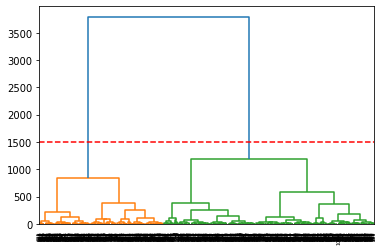

処理完了


In [1]:
import pandas as pd
import numpy as np
import os
import sys
import subprocess  # 追加
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# 変数設定
INPUT_FOLDER = "2_data"
INPUT_FILE = 'sample.csv' 
OUTPUT_FOLDER = "3_output"
SAVE_NAME ='clustering.png'
threshold_distance = 1500  # y軸閾値
criter = 8                 # クラスタ数
ID = "顧客ID"

# パス設定
current_dpath = os.getcwd()
parent_dpath = os.path.dirname(current_dpath)

input_path = os.path.join(parent_dpath, INPUT_FOLDER, INPUT_FILE)
output_path = os.path.join(parent_dpath, OUTPUT_FOLDER)
os.makedirs(output_path, exist_ok=True)

save_path = os.path.join(output_path, SAVE_NAME)

# CSV読み込み（エンコード判定）
try:
    df = pd.read_csv(input_path, encoding="utf-8")
except UnicodeDecodeError:
    df = pd.read_csv(input_path, encoding="cp932")


# linkage計算
Z = linkage(df.iloc[:, 1:4], method='ward')

# デンドログラム描画
dendro = dendrogram(Z, labels=df[ID].values)
plt.axhline(y=threshold_distance, color='red', linestyle='--')
plt.rcParams["font.size"] = 10
plt.savefig(save_path)
plt.show()

# ① 閾値で分割
labels_distance = fcluster(Z, t=threshold_distance, criterion='distance')
df_distance = df.copy()
df_distance["cluster"] = labels_distance
ordered_df_distance = df_distance.iloc[dendro["leaves"]].reset_index(drop=True)

ordered_df_distance.to_csv(
    os.path.join(output_path, f"clustering_distance_{threshold_distance}.csv"),
    index=False, encoding='utf-8-sig'
)

# ② クラスタ数で分割
labels_maxclust = fcluster(Z, t=criter, criterion='maxclust')
df_maxclust = df.copy()
df_maxclust['cluster'] = labels_maxclust

df_maxclust.to_csv(
    os.path.join(output_path, f"clustering_maxclust_{criter}.csv"),
    index=False, encoding='utf-8-sig'
)

# 保存フォルダを開く（OS別対応）
if sys.platform.startswith('win'):
    os.startfile(output_path)
elif sys.platform.startswith('darwin'):
    subprocess.run(['open', output_path])
else:
    subprocess.run(['xdg-open', output_path])

print('処理完了')
